In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar  

In [2]:
data = pd.read_csv(r"C:\Users\alvar\OneDrive\Desktop\TU WIEN\Business Intelligence\Assignment3\archive\hotel_bookings.csv", sep = ',')
data = data.drop('company',axis=1)

Dropped the 'company' column because it had 95% NaN values in it.

In [3]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Task 2: Data Understanding

## 2.1: Attribute types and their semantics, and statistical Properties

In [4]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


https://www.google.com/search?q=can+numerical+variables+be+integers&oq=can+numerical+variables+be+integers&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigAdIBCDYwMjNqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8

### Hotel

Even though this attribute is not specifically binary, it does represent a binary decision. Either the hotel can be a City Hotel (which in the future will be represented by 0), or it can be a Resort Hotel (which will be represented by 1).

In [5]:
print(data['hotel'].value_counts())

print('The percentage of City Hotel observations is: ', round(data['hotel'].value_counts()[0] / len(data), 3))
print('The percentage of Resort Hotel observations is: ',round(data['hotel'].value_counts()[1] / len(data), 3))

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
The percentage of City Hotel observations is:  0.664
The percentage of Resort Hotel observations is:  0.336


There is quite a big imbalance between the number of observations from the City Hotel and the Resort Hotel, we need to be careful with that.

In [6]:
print('The data has', data['hotel'].isna().sum(), 'null values for the hotel attribute.')

The data has 0 null values for the hotel attribute.


## is_canceled

Value indicating if the booking was canceled (1) or not (0), hence totally binary. 

In [7]:
print(data['is_canceled'].value_counts())

print('The percentage of not cancelled reservations is: ', round(data['is_canceled'].value_counts()[0] / len(data), 3))
print('The percentage of cancelled reservations is: ',round(data['is_canceled'].value_counts()[1] / len(data), 3))

0    75166
1    44224
Name: is_canceled, dtype: int64
The percentage of not cancelled reservations is:  0.63
The percentage of cancelled reservations is:  0.37


In [8]:
print('The data has', data['is_canceled'].isna().sum(), 'null values for the is_canceled attribute.')

The data has 0 null values for the is_canceled attribute.


## lead_time

Number of days that elapsed between the entering date of the booking into the PMS and the arrival date, hence the advance with which the reservation was made. 

In [9]:
print("Basic Statistics:")
print(data['lead_time'].describe())

Basic Statistics:
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


This attribute is a numeric attribute, with values ranging from 0 to 737 days. The mean is 104 days.

In [10]:
print('The data has', data['lead_time'].isna().sum(), 'null values for the lead_time attribute.')

The data has 0 null values for the lead_time attribute.


## arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month

These variables are pretty self explanatory: 
- arrival_date_year is the year in which the check-in to the hotel was made. It is a numeric value.
- arrival_date_month is the month in which the check-in to the hotel was made. It is a categorical value, in which there are 12 categories (each month of the year).
- arrival_date_week_number is the week in which the check-in to the hotel was made. It is a numerical value, ranging between 0 and 53 (the number of weeks in a year).
- arrival_date_day_of_month is the day of the month in which the check-in to the hotel was made. It is a numerical value, ranging from 1 to 31. 

In [11]:
print("Basic Statistics for arrival_date_year:")
print(data['arrival_date_year'].describe())

Basic Statistics for arrival_date_year:
count    119390.000000
mean       2016.156554
std           0.707476
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64


In [12]:
print(data['arrival_date_year'].value_counts())

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64


We can see that there is information on the dataset from the years 2015 to 2017, both included. 

In [13]:
(data['arrival_date_month'].value_counts())

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [14]:
print("Basic Statistics for arrival_date_week_number:")
print(data['arrival_date_week_number'].describe())

Basic Statistics for arrival_date_week_number:
count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64


In [15]:
print("Basic Statistics for arrival_date_day_of_month:")
print(data['arrival_date_day_of_month'].describe())

Basic Statistics for arrival_date_day_of_month:
count    119390.000000
mean         15.798241
std           8.780829
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: arrival_date_day_of_month, dtype: float64


There we have information about the 4 attributes relating to the arrival of the guests.

## stays_in_weekend_nights and stays_in_week_nights

stays_in_weekend_nights corresponds to the number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

stays_in_week_nights corresponds to the number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

In [16]:
print("Basic Statistics for stays_in_weekend_nights:")
print(data['stays_in_weekend_nights'].describe())

Basic Statistics for stays_in_weekend_nights:
count    119390.000000
mean          0.927599
std           0.998613
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: stays_in_weekend_nights, dtype: float64


In [17]:
print("Basic Statistics for stays_in_week_nights:")
print(data['stays_in_week_nights'].describe())

Basic Statistics for stays_in_week_nights:
count    119390.000000
mean          2.500302
std           1.908286
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64


They are both numeric values, stays_in_weekend_nights goes from 0 to 19, with its mean being 0.92; whereas stays_in_week_nights goes from 0 to 50, with its mean being 2.5.

## adults, children, babies

These are 3 numerical values that represent the number of adults, children and babies in a reservation. 

In [18]:
print("Basic Statistics for adults:")
print(data['adults'].describe())

Basic Statistics for adults:
count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64


In [19]:
data['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

It is a bit weird that there are 403 reservations without adults, hence only children or babies. This is something we have to investigate more in the data preparation report. We see the max number of adults in a reservation is 55, and the most common number is 2. 

In [20]:
print("Basic Statistics for children:")
print(data['children'].describe())

Basic Statistics for children:
count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64


In [21]:
print("Basic Statistics for babies:")
print(data['babies'].describe())

Basic Statistics for babies:
count    119390.000000
mean          0.007949
std           0.097436
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: babies, dtype: float64


In [22]:
print('The percentage of reservations without children is: ', round((data['children'] == 0).sum() / len(data), 3))
print('The percentage of reservations without babies is: ', round((data['babies'] == 0).sum() / len(data), 3))


The percentage of reservations without children is:  0.928
The percentage of reservations without babies is:  0.992


From this data, we could assume that the hotels are not made for families, maybe they're more for work or adult-oriented, since the number of children and babies in the reservations is extremely low. Both have a mean close to 0, as well as the third quartile being 0, and both maximums are 10. 

## meal

Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal. This is a categorical variable with 5 possible categories.

In [23]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [24]:
print('The data has', data['meal'].isna().sum(), 'null values for the meal attribute.')

The data has 0 null values for the meal attribute.


We could join the categories 'Undefined' and 'SC', since they both mean that there is no meal reserved. 

## country

Country of origin of the guests. Categories are represented in the ISO 3155–3:2013 format. This is a categorical variable containing 177 different categories. We can see that the most common nationality of guests is Portuguese, followed by the British and the French, with Spain fourth.

In [25]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [26]:
print("Basic Statistics for country:")
print(data['country'].describe())

Basic Statistics for country:
count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object


In [27]:
print('The data has', data['country'].isna().sum(), 'null values for the country attribute.')

The data has 488 null values for the country attribute.


Given these null values, we will have to think what to do with those observations, and see if it could be a problem. 

## market_segment

Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”. It is a categorical variable with 8 possible categories, Online TA being the most common one. 

In [28]:
print("Basic Statistics for market_segment:")
print(data['market_segment'].describe())

Basic Statistics for market_segment:
count        119390
unique            8
top       Online TA
freq          56477
Name: market_segment, dtype: object


In [29]:
print(data['market_segment'].value_counts())

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64


We see there is also 2 observations defined as 'Undefined', so we might need to work with them in the data preparation part.

## distribution_channel

Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”. Once again, this is a categorical variable with 5 different categories, TA/TO being the most common one.

In [30]:
print("Basic Statistics for distribution_channel:")
print(data['distribution_channel'].describe())

Basic Statistics for distribution_channel:
count     119390
unique         5
top        TA/TO
freq       97870
Name: distribution_channel, dtype: object


In [31]:
print(data['distribution_channel'].value_counts())

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


And once again, we have 5 undefined observations which may cause problems later on, so we'll deal with them in the data preparation part.

## is_repeated_guest

Value indicating if the booking name was from a repeated guest (1) or not (0). Binary variable. 

In [32]:
print(data['is_repeated_guest'].value_counts())

print('The percentage of not repeated guests is: ', round(data['is_repeated_guest'].value_counts()[0] / len(data), 3))
print('The percentage of repeated guests is: ',round(data['is_repeated_guest'].value_counts()[1] / len(data), 3))

0    115580
1      3810
Name: is_repeated_guest, dtype: int64
The percentage of not repeated guests is:  0.968
The percentage of repeated guests is:  0.032


We can see that in the data we have, the majority of the guests have not repeated a reservation in the hotel. This could be important to evaluate the quality of the hotel, and a good thinking point to try to retain more customers.

## previous_cancellations, previous_bookings_not_canceled

There variables present the number of previous bookings that were cancelled by the customer prior to the current booking, and the number of previous bookings not cancelled by the customer prior to the current booking. They are both numeric variables. 

In [33]:
print("Basic Statistics for previous_cancellations:")
print(data['previous_cancellations'].describe())

Basic Statistics for previous_cancellations:
count    119390.000000
mean          0.087118
std           0.844336
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: previous_cancellations, dtype: float64


In [34]:
(data['previous_cancellations'].value_counts())

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

26 customers have cancelled a reservation 26 times in these hotels. This is a weird fact.

In [35]:
print("Basic Statistics for previous_bookings_not_canceled:")
print(data['previous_bookings_not_canceled'].describe())

Basic Statistics for previous_bookings_not_canceled:
count    119390.000000
mean          0.137097
std           1.497437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.000000
Name: previous_bookings_not_canceled, dtype: float64


In [36]:
(data['previous_bookings_not_canceled'].value_counts())

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

As expected, the vast majority of observations have these variables as 0, since the vast majority of guests have not made a reservation in these hotels before.

## reserved_room_type, assigned_room_type

The reserved_room_type is the code of the room type reserved. Code is presented instead of designation for anonymity reasons. The assigned_room_type is the code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to overbooking or other situations. Both of these variables are categorical, with 10 possible values for the reserved room and 12 possible values for the assigned room. This difference could be explained by the hotels having special rooms not available for reserving, but being there in special situations for 'backup'. 

In [37]:
print("Basic Statistics for reserved_room_type:")
print(data['reserved_room_type'].describe())

Basic Statistics for reserved_room_type:
count     119390
unique        10
top            A
freq       85994
Name: reserved_room_type, dtype: object


In [38]:
(data['reserved_room_type'].value_counts())

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [39]:
print("Basic Statistics for assigned_room_type:")
print(data['assigned_room_type'].describe())

Basic Statistics for assigned_room_type:
count     119390
unique        12
top            A
freq       74053
Name: assigned_room_type, dtype: object


In [40]:
(data['assigned_room_type'].value_counts())

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

We can see that for both variables, the most common type of room is A, with quite a big difference. It is in both cases more than half of the observations. 

## booking_changes

This variable represents the number of changes/amendments made to the booking from the moment the booking was entered on the PMS. It is a numerical variable. 

In [41]:
print("Basic Statistics for booking_changes:")
print(data['booking_changes'].describe())

Basic Statistics for booking_changes:
count    119390.000000
mean          0.221124
std           0.652306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: booking_changes, dtype: float64


In [42]:
print(round((data['booking_changes'] == 0).sum() / len(data), 3))


0.849


It goes from 0 to 21 changes, although the vast majority of observations have value 0, approximately 85%. 

## deposit_type

Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit, Non Refund, and Refundable. 

In [43]:
print("Basic Statistics for deposit_type:")
print(data['deposit_type'].describe())

Basic Statistics for deposit_type:
count         119390
unique             3
top       No Deposit
freq          104641
Name: deposit_type, dtype: object


In [44]:
data['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Once again, the vast majority of the observations have No Deposit, so in the data preparation we might need to delete or play with this variable to see if it is useful.

## agent

ID of the travel agency that made the booking. Even though this variable is numerical (the values are numbers) it represents a categorical decision: each agent is represented by a number, thus each agent is a category. There are 333 different categories (agents) for this variable. 

In [45]:
print("Basic Statistics for agent:")
print(data['agent'].describe())

Basic Statistics for agent:
count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64


In [46]:
print(data['agent'].value_counts())

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64


In [47]:
print('There are also', data['agent'].isnull().sum(), 'null values for agent variable.')

There are also 16340 null values for agent variable.


## days_in_waiting_list

Number of days the booking was in the waiting list before it was confirmed to the customer. It is therefore a numerical discrete variable. 

In [48]:
print("Basic Statistics for days_in_waiting_list:")
print(data['days_in_waiting_list'].describe())

Basic Statistics for days_in_waiting_list:
count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64


In [49]:
data['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

We can see that the vast majority of reservations are confirmed in the same day they're made, but there are some cases its not. The maximum a customer has had to wait has been 391 days, while the average is 2.3 days.

## customer_type

Type of booking, assuming one of four categories: Contract, Transient, Transient-Party and Group. The most common category is Transient, with 75% of the reservations.

In [50]:
print("Basic Statistics for customer_type:")
print(data['customer_type'].describe())

Basic Statistics for customer_type:
count        119390
unique            4
top       Transient
freq          89613
Name: customer_type, dtype: object


In [51]:
print(data['customer_type'].value_counts())

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64


In [52]:
print(round(data['customer_type'].value_counts()[0] / len(data), 3))

0.751


## adr

Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights. This is our objective variable, the one we want to predict using a regression model. It is a numerical variable. 

In [53]:
print("Basic Statistics for adr:")
print(data['adr'].describe())

Basic Statistics for adr:
count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64


In [54]:
len(data['adr'].value_counts())

8879

In [55]:
(data['adr'] < 0).sum()


1

There are 8879 different daily rates recorded in the dataset, with the maximum being 5400 (we will assume its euros) and the minimum being -6.38. In the data preparation phase, we will try to understand why there is a single negative value in this column. 

## required_car_parking_spaces

Number of car parking spaces required by the customer. It is a numerical variable, ranging from 0 to 8. 

In [56]:
print("Basic Statistics for required_car_parking_spaces:")
print(data['required_car_parking_spaces'].describe())

Basic Statistics for required_car_parking_spaces:
count    119390.000000
mean          0.062518
std           0.245291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: required_car_parking_spaces, dtype: float64


In [57]:
(data['required_car_parking_spaces'].value_counts())

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

We will probably erase this column, since it provides virtually no information, and the vast majority of the observations have value 0 in it. 

## total_of_special_requests

Number of special requests made by the customer (e.g. twin bed or high floor). Numerical variable ranging from 0 to 5, once again most values being 0 or 1.

In [58]:
print("Basic Statistics for total_of_special_requests:")
print(data['total_of_special_requests'].describe())

Basic Statistics for total_of_special_requests:
count    119390.000000
mean          0.571363
std           0.792798
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: total_of_special_requests, dtype: float64


In [59]:
(data['total_of_special_requests'].value_counts())

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

## reservation_status

Reservation last status, assuming one of three categories: Canceled; Check-Out or No-Show. Most of the observations fall in the Check-Out category, followed by the Canceled, and very few are No-Show.

In [60]:
print("Basic Statistics for reservation_status:")
print(data['reservation_status'].describe())

Basic Statistics for reservation_status:
count        119390
unique            3
top       Check-Out
freq          75166
Name: reservation_status, dtype: object


In [61]:
(data['reservation_status'].value_counts())

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

## reservation_status_date

Date at which the last status was set. It is a variable of type Date, which is not easy to work with. Most likely, we will erase it in order to be able to work better with our data. The day with the most status updates was the 21st of October of 2015. 

In [62]:
print("Basic Statistics for reservation_status_date:")
print(data['reservation_status_date'].describe())

Basic Statistics for reservation_status_date:
count         119390
unique           926
top       2015-10-21
freq            1461
Name: reservation_status_date, dtype: object


In [63]:
(data['reservation_status_date'].value_counts())

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64

## 2.2: Statistical properties describing the dataset including correlations 

## General idea

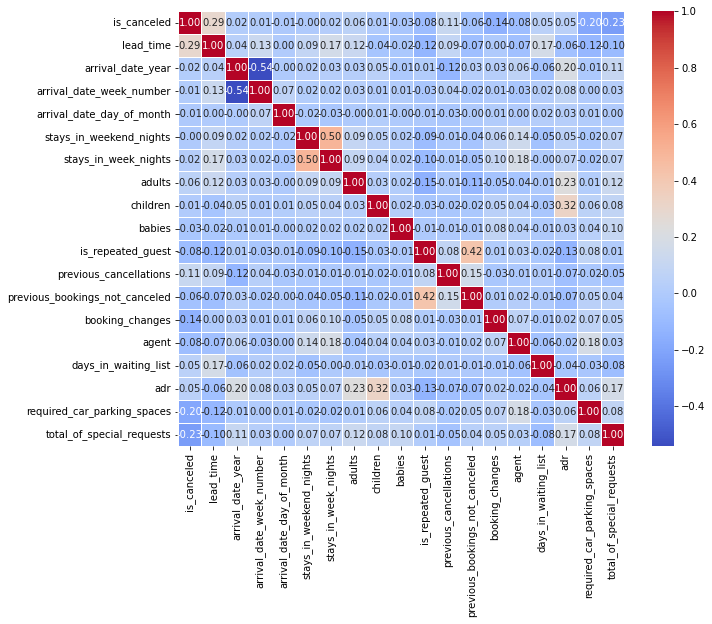

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix for numerical attributes
correlation_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with a color scale indicating the level of correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

## Only numerical variables

In [65]:
numerical_attributes = ['lead_time','arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list' , 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
numerical_data = data[numerical_attributes]
numerical_data

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,3,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,4,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,104.40,0,0


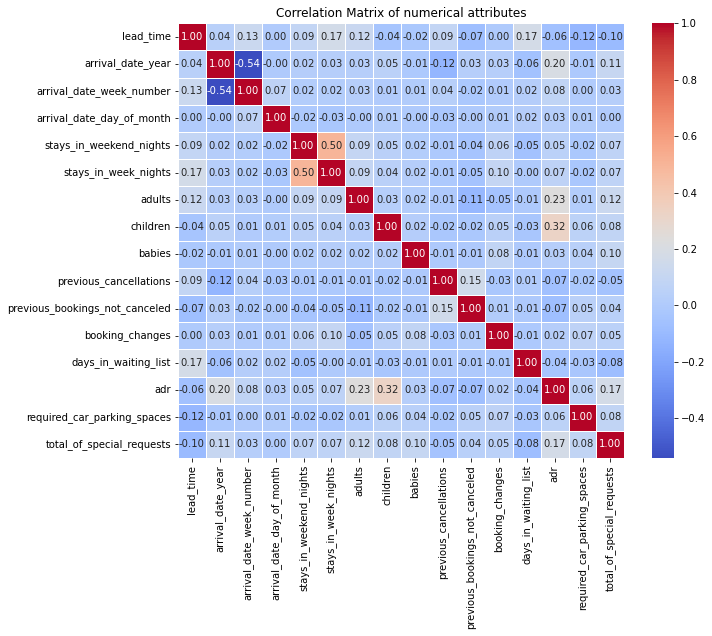

In [66]:
# Create a correlation matrix for numerical attributes
correlation_matrix_numerical = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with a color scale indicating the level of correlation
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of numerical attributes')

# Show the plot
plt.show()

## Numerical variables and binary variables

In [67]:
binary_attributes = ['is_canceled', 'is_repeated_guest']
binary_df = data[binary_attributes]

binary_data = pd.concat([numerical_data, binary_df], axis=1)

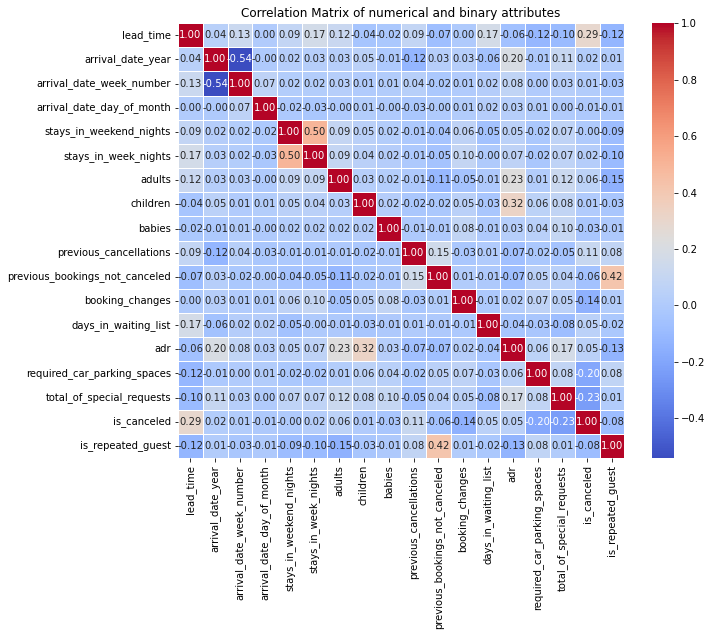

In [68]:
# Create a correlation matrix for numerical attributes
correlation_matrix_binary = binary_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with a color scale indicating the level of correlation
sns.heatmap(correlation_matrix_binary, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of numerical and binary attributes')

# Show the plot
plt.show()

## Numerical, binary and categorical variables using one-hot encoding (when possible)

In [69]:
categorical_attributes = ['hotel', 'arrival_date_month','meal','country', 'market_segment','distribution_channel', 'reserved_room_type','assigned_room_type' ,'deposit_type','agent','customer_type','reservation_status','reservation_status_date']


In [70]:
df_encoded = pd.get_dummies(data, columns=categorical_attributes)
len(df_encoded.columns)

1518

We cannot compute the correlation matrix for all the categorical variables using one-hot-encoding, since it would be a 1518x1518 matrix, and there would be too much (or none at all) information to extract. 

However, there are certain categorical attributes that do seem quite important, and that do not have that many categories to choose from. Let's try and choose them, one-hot-encode them to see if we can get a decent matrix then.

In [71]:
categorical_attributes_2 = ['hotel', 'reserved_room_type','assigned_room_type']
df_encoded_2 = pd.get_dummies(data, columns=categorical_attributes_2)
len(df_encoded_2.columns)

52

In [72]:
categorical_data = pd.concat([binary_data, df_encoded_2[['hotel_City Hotel','hotel_Resort Hotel', 'reserved_room_type_A', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H',
       'reserved_room_type_L', 'reserved_room_type_P', 'assigned_room_type_A',
       'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D',
       'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G',
       'assigned_room_type_H', 'assigned_room_type_I', 'assigned_room_type_K',
       'assigned_room_type_L', 'assigned_room_type_P']]], axis=1)

In [73]:
categorical_data

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,...,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P
0,342,2015,27,1,0,0,2,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
119387,34,2017,35,31,2,5,2,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
119388,109,2017,35,31,2,5,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


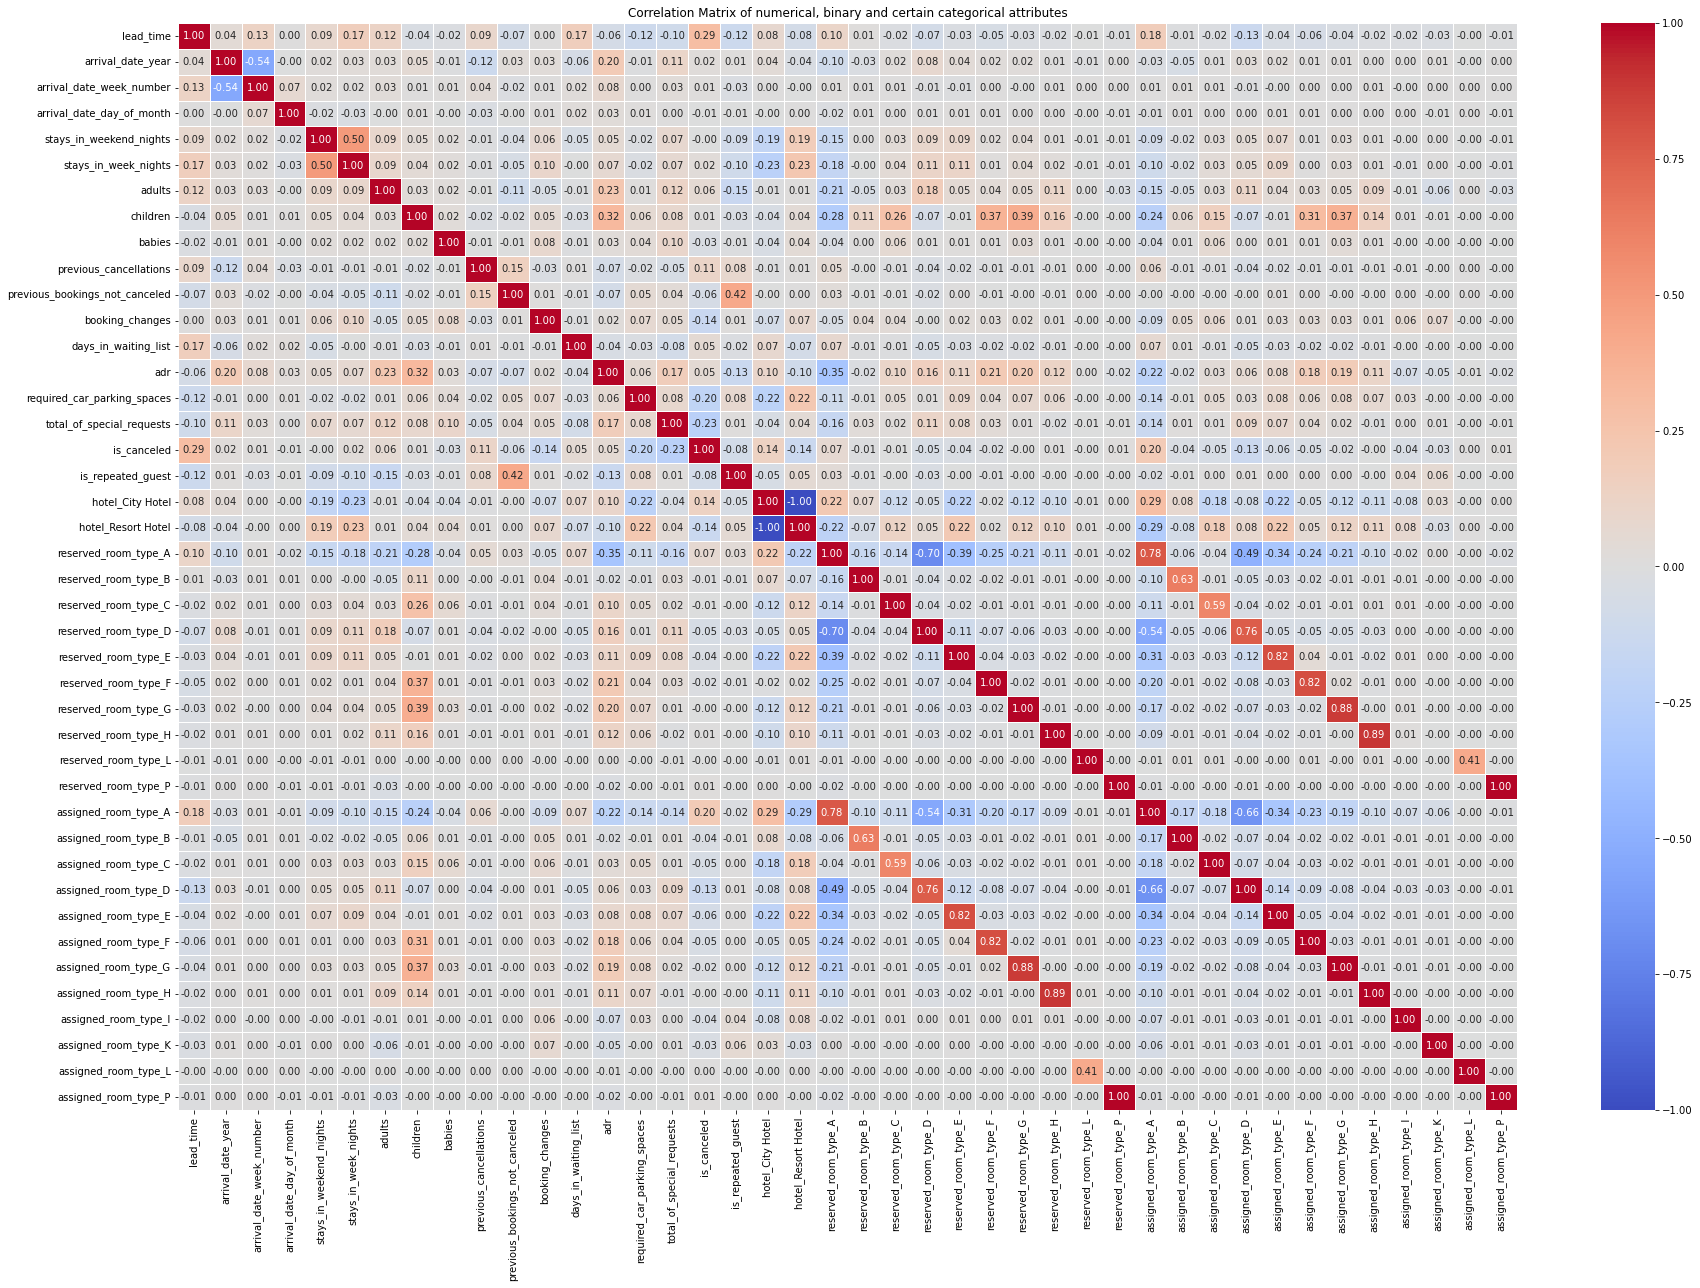

In [74]:
# Create a correlation matrix for numerical attributes
correlation_matrix_categorical = categorical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 20))

# Create a heatmap with a color scale indicating the level of correlation
sns.heatmap(correlation_matrix_categorical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of numerical, binary and certain categorical attributes')

# Show the plot
plt.show()

## 2.3 Data Quality

### Missing values

In [75]:
# Check for missing values in the entire dataset
total_missing = data.isnull().sum().sum()

# Display the total number of missing values
print(f"Total Missing Values: {total_missing}")


Total Missing Values: 16832


In [76]:
# Check for missing values in each column
missing_per_column = data.isnull().sum()

# Display missing values per column, skipping columns with no missing values
print("Missing Values per Column:")
for column, missing_count in missing_per_column.iteritems():
    if missing_count > 0:
        print(f"{column}: {missing_count}")



Missing Values per Column:
children: 4
country: 488
agent: 16340


In [77]:
# Calculate percentage of missing values per column
missing_percentage_per_column = (data.isnull().sum() / len(data)) * 100

# Display missing percentage per column, skipping columns with no missing values
print("Percentage of Missing Values per Column:")
for column, missing_percentage in missing_percentage_per_column.iteritems():
    if missing_percentage > 0:
        print(f"{column}: {missing_percentage:.2f}%")



Percentage of Missing Values per Column:
children: 0.00%
country: 0.41%
agent: 13.69%


### Explanation of missing values

In [78]:
observations_with_null = data[data['children'].isnull()]
observations_with_null

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,0,No Deposit,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,0,No Deposit,14.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,0,No Deposit,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,0,No Deposit,9.0,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


$ Children $


As we can see here, the 4 observations which have 'children' null values were canceled. Hence, we could think that the parents did not say if there were kids or not in the reservation, and the hotel could not verify it since they did not go through with the reservation. Since these are only 4 observations which correspond to less than 0.01% of the dataset, if needed we could erase them without it affecting our results. 

In [79]:
observations_with_null = data[data['country'].isnull()]
observations_with_null.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,2,No Deposit,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,0,No Deposit,NaN,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,0,No Deposit,NaN,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,0,No Deposit,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,0,No Deposit,NaN,0,Transient,50.0,0,0,Canceled,2016-10-13


$ Country $

In the Country null values, we believe it might be possible that the country of origin of those clients was not recognised by the country in which the hotels are, which could explain why no value was inputted. Once again, these observations only amount for 0.41% of the data, which is almost negligible. If needed, we could erase them or input the top country (Portugal) to not lose more information.

$ Agent $ 

On the Agent attribute, however, there are 16340 observations with a null value, which corresponds to 13.7% of the dataset. Hence, we cannot eliminate all those observations. The agent attribute explains the ID of the travel agency that made the booking. We do not believe this attribute to be of much use, and it is not correlated with any of the other attributes present in the correlation matrices. We think the best idea is simply to drop this column and keep using the dataset without it, as there are too many null values to ignore them or fill them with the top Agent value. 

### Data provenance and Data cleansing

The data comes from the article [**Hotel booking demand datasets**](https://www.sciencedirect.com/science/article/pii/S2352340918315191) from Nuno Antonio, Ana Almeida, Luis Nunes. 

The data describes two datasets with information about hotel reservations. There are 2 types of hotels: a resort and a city hotel. The structure of the two datasets is identical, and every observation is a hotel reservation. Both databases include reservations scheduled to arrive between July 1, 2015, and August 31, 2017. 'Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.'

Furthermore, the data was cleaned by Thomas Mock and Antoine Bichat as part of #TidyTuesday. The following code in Github explains how it was done: [**Github**](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md).

This is probably why it has so few null values, the data is complete and anonimyzed correctly, and all the attribute's values make sense.

## 2.4 Visual Exploration of the data

### Relation between 'adr' and 'children' and 'adults' (with and without outlier for better visualization)

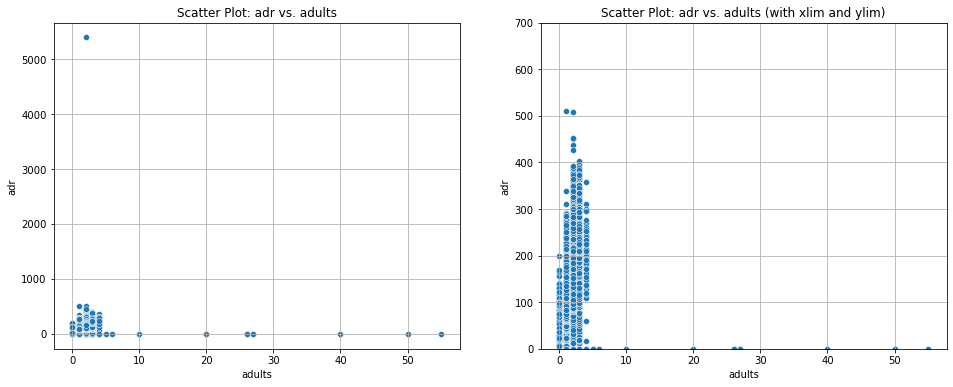

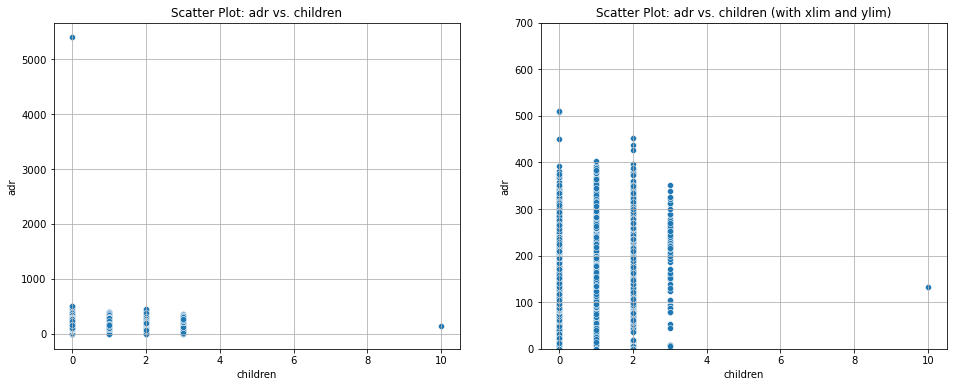

In [80]:
# Scatter plot between 'adr' and 'adults'
plt.figure(figsize=(16, 6))

# First scatter plot without xlim and ylim
plt.subplot(1, 2, 1)
sns.scatterplot(x='adults', y='adr', data=data)
plt.title('Scatter Plot: adr vs. adults')
plt.grid()

# Second scatter plot with xlim and ylim
plt.subplot(1, 2, 2)
sns.scatterplot(x='adults', y='adr', data=data)
plt.title('Scatter Plot: adr vs. adults (with xlim and ylim)')
plt.ylim(0, 700)  # Adjust ylim based on your data
plt.grid()

plt.show()

# Scatter plot between 'adr' and 'children'
plt.figure(figsize=(16, 6))

# Third scatter plot without xlim and ylim
plt.subplot(1, 2, 1)
sns.scatterplot(x='children', y='adr', data=data)
plt.title('Scatter Plot: adr vs. children')
plt.grid()

# Fourth scatter plot with xlim and ylim
plt.subplot(1, 2, 2)
sns.scatterplot(x='children', y='adr', data=data)
plt.title('Scatter Plot: adr vs. children (with xlim and ylim)')
plt.ylim(0, 700)  # Adjust ylim based on your data
plt.grid()

plt.show()


### Difference in the average 'adr' for the 2 types of hotels

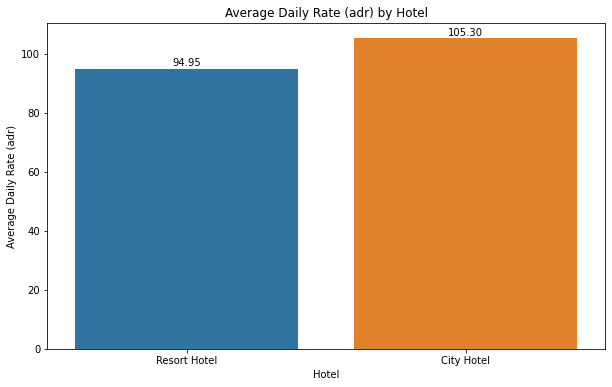

In [81]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='hotel', y='adr', data=data, ci=None)  # Setting ci=None disables confidence intervals
plt.title('Average Daily Rate (adr) by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate (adr)')

# Get the maximum 'adr' value to determine the position of horizontal lines
max_adr = data['adr'].max()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, f'{p.get_height():.2f}', ha='center')

plt.show()

### Check to see if the 'adr' has a relation with the month of the arrival

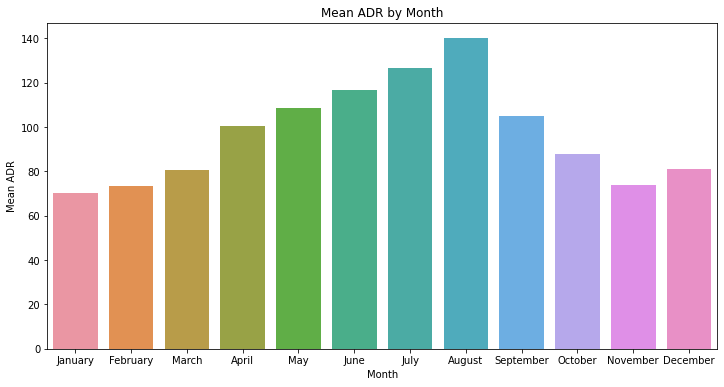

In [82]:
# Convert 'arrival_date_month' to a categorical variable with custom order
month_order = list(calendar.month_name)[1:]  # Exclude the empty string at index 0
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=month_order, ordered=True)

# Create a point plot with mean 'adr' values
plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_date_month', y='adr', data=data, ci=None)
plt.title('Mean ADR by Month')
plt.xlabel('Month')
plt.ylabel('Mean ADR')
plt.show()

### Check to see if the 'adr' has a relation with the year of the arrival

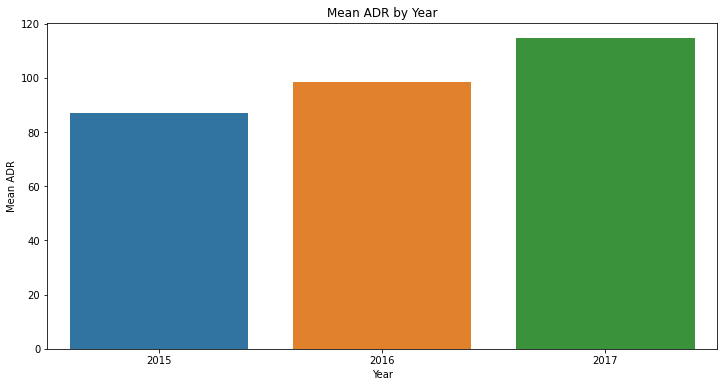

In [83]:
# Create a point plot with mean 'adr' values
plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_date_year', y='adr', data=data, ci=None)
plt.title('Mean ADR by Year')
plt.xlabel('Year')
plt.ylabel('Mean ADR')
plt.show()

### Number of observations by arrival year

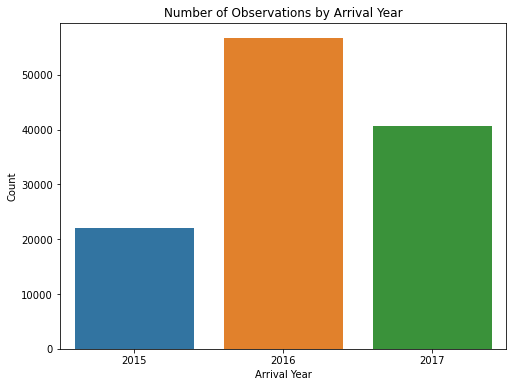

In [84]:
# Create a countplot for 'arrival_date_year'
plt.figure(figsize=(8, 6))
sns.countplot(x='arrival_date_year', data=data)
plt.title('Number of Observations by Arrival Year')
plt.xlabel('Arrival Year')
plt.ylabel('Count')
plt.show()

### 'adr' trends over time 

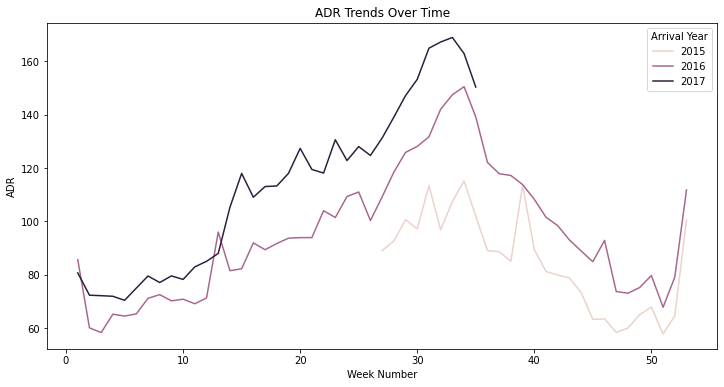

In [85]:
# Create a line plot for trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_week_number', y='adr', hue='arrival_date_year', data=data, ci=None)
plt.title('ADR Trends Over Time')
plt.xlabel('Week Number')
plt.ylabel('ADR')
plt.legend(title='Arrival Year')
plt.show()

## 2.5 Ethically sensitive data

Taking a look at the data, the way it has been cleaned and anonymized, there is really no ethically sensitive data to extract. One cannot know the race, sex, or any detail about any of the clients of neither hotel. The only possibility of sensitive data would be the attributes 'children' and 'babies', which do tell you something about the clients and possibly their familiar status. However, I do not think this is a big issue, since all the data is anonymized and impossible to track back to the families. 

There are, however, some unbalanced distributions inside the dataset that do need to be at least acknowledged, in order to fully understand what we're working with. 

Firstly, we have to say that the number of observations from the City hotel is 79330 (66.4%) whereas the Resort Hotel only has 40060 observations (33.6%). This might or might now affect our results, but we do have to know that we have a lot more information from the city than from the resort.

There can also be a certain bias incurred in the variable 'arrival_date_month', since we know that these are Portuguese hotels mostly visited during the summer station. Hence, most of the observations are from the months of summer, and the months of winter have many observations less.

Finally, on the country attribute, the most common country is Portugal, which make sense since it is where the hotels are. However, it quadruples the second most common country of origin, so we may need to be cautious if using that variable for our results.

## 2.6 Potential risks and additional types of bias

As explained before, we do not think there is a real risk by using this dataset, thanks to the cleaning and preprocessing work of its authors. 

We would get an external expert to consult on the 'children' and 'babies' variables, to see if there is any possibility of the families being tracked and any personal information becoming public. 

We also think that the 'country' attribute could be a problem, but we doubt it will have weight in the regression, since the hotels cannot discriminate by country of origin to give prices for their rooms. So, if it is the case that this attribute is biased, it would then mean the hotels are doing something illegal, and discriminating their clients based on their nationality. 

Finally, as we said before, there is a big imbalance between the hotels in the dataset, but we do not think this will have a bias onto our results. 

## 2.7 Actions for Data Preparation

There are several actions needed for the Data Preparation phase in order to start working with our dataset. 

Firstly, we have to say that we already started this Data Preparation at the beginning of the notebook, by eliminating the column 'Company'. This column represented the ID of the company/entity that made the booking or was responsible for paying the booking. As it was filled at 95% with NaN value, we just thought it best to drop it at the beginning as it was giving us no information. 

Secondly, as we talked about before, we would eliminate the four observations that have Null values in the 'children' attribute. We believe that this attribute can have a lot of impact in the regression to predict 'adr', and we don't want those values to mess with our models. Furthermore, it being less than 0.01% of the dataset, dropping them would cause no harm to our model or predictions whatsoever. 

Thirdly, we can see in the correlation matrix that 'arrival_date_year' and 'arrival_date_week_number' have quite a high correlation (0.54). We are thinking it could be wise to eliminate one of the two columns in order to delete that high correlation and not have problems with the regression model.

Also, as we have seen in the data visualization extract, we have an observation with an abnormally high 'adr', an outlier, which might mess with our models. We will also drop that observation in order to have a more 'normal' distribution of 'adr'. 

Furthermore, we are going to drop the columns that do not contain numerical or binary information. After careful consideration, we believe that having 31 attributes is too much for a regression model. Furthermore, most of the categorical variables have too many categories to be able to do one-hot-encoding and work with it, and we believe that most of them are practically useless when trying to predict 'adr'. This includes the 'agent' and 'country' variables we mentioned before, which will also be dropped. We will keep 'hotel' and transform it into a binary variable (0 or 1), 

$$ QUE HACER CON RESERVED_ROOM_TYPE Y ASSIGNED_ROOM_TYPE ??? PUEDEN SER MUY IMPORTANTES... $$

Finally, we might want to under-sample the observations in order to get a 50-50 split on the 'hotel' attribute for the dataset. This would imply eliminating observations from the 'City Hotel' down to the same number of observations we currently have from the 'Resort Hotel'. However, under-sampling implies a loss of information which usually results in a worse accuracy for our model, so we need to make sure that the imbalance in the 'hotel' class really does make a difference in the output predictions. If it does not, we won't under-sample the dataset. 

$$ DECIDIR QUE HACER, SI UNDERSAMPLING O NO$$

As a side note, we do not want to over-sample because it would mean creating new observations by 'recycling' the ones we already have, and we do not believe it is wise to do so with personal data, as it could also create false output predictions. 